# Explanatory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
benin_data = pd.read_csv('../data/benin-malanville.csv')


In [3]:
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

# Summary Statistics

In [5]:
numeric_data = benin_data.select_dtypes(include=["number"])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64
 17  Comments       0 non-null    

### since the Comments column is totally empty I will drop it

In [6]:
numeric_data.drop('Comments', axis=1)

stats_summary = numeric_data.describe().transpose()
stats_summary["median"] = numeric_data.median()
stats_summary["variance"] = numeric_data.var()

In [7]:
stats_summary

,count,mean,std,min,25%,50%,75%,max,median,variance
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0,1.8,109647.955903
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3,-0.1,68492.386135
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2,1.6,25182.856923
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3,4.5,106860.248524
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3,4.3,100195.365569
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8,28.0,35.097295
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0,55.1,788.097191
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5,1.9,2.571103
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6,2.6,4.117327
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2,0.5,0.074745


# Data Quality Check 

In [8]:
missing_values = benin_data.isnull().sum()
missing_percentage = (missing_values / len(benin_data)) * 100
print("Missing Values:\n", missing_percentage)

Missing Values:
 Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


### Incorrect Entries (Negative values where only positive is allowed)

In [9]:
for col in ['GHI', 'DNI', 'DHI']:
    benin_data[col] = benin_data[col].clip(lower=0)
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

### Outlier detection using boxplots

/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12

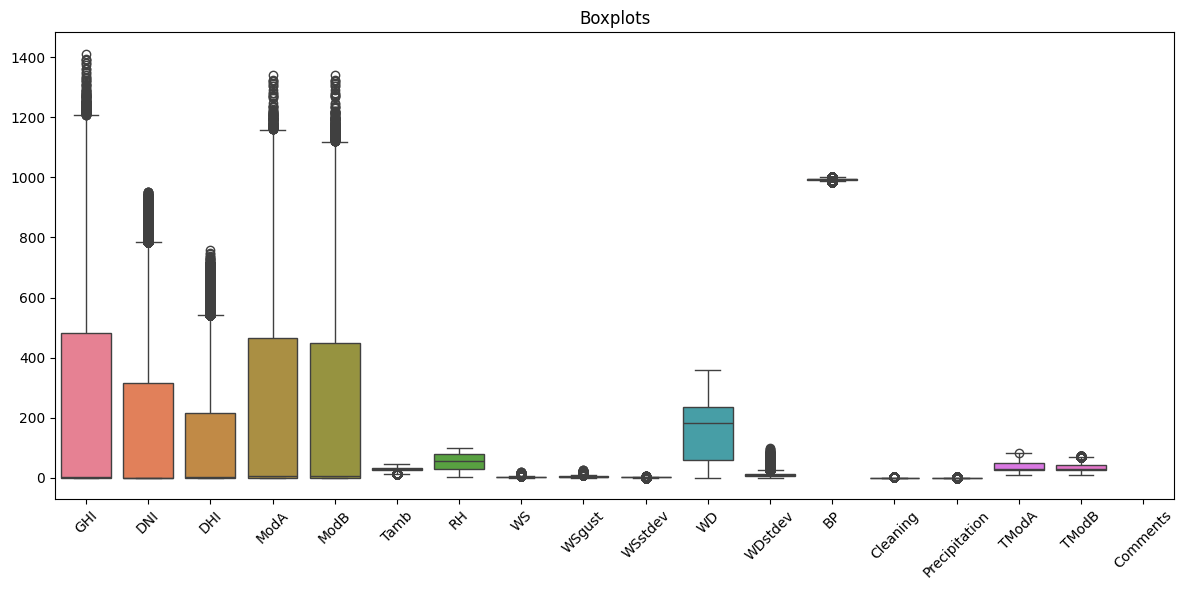

In [10]:
plt.figure(figsize=(12, 6))  
sns.boxplot(data=benin_data)
plt.title('Boxplots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

In [ ]:
for col in outlier_columns:
    Q1 = benin_data[col].quantile(0.25)
    Q3 = benin_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = benin_data[(benin_data[col] < lower_bound) | (benin_data[col] > upper_bound)]
    print(f"{col} Outliers:\n", outliers)

GHI Outliers:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849     2021-08-09 14:10  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850     2021-08-09 14:11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
522046  2022-08-06 12:47  1218.0  619.7  580.5  1130.0  1128.0  30.3  70.7   
522067  2022-08-06 13:08  1218.0  724.9  477.8  1137.0  1133.0  30.5  67.3   
522073  2022-08-06 13:14  1218.0  759.1  446.2  1120.0  1112.0  30.9  66.3   
522074  2022-08-06 13:15  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075  2022-08-06 13:16  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         WS  WSgust  WSstdev     WD  WDstdev   B

In [13]:
print("Data Quality Summary:")
print(f"Missing values: \n{missing_percentage}")
print(f"Outliers identified: \n{outliers}")


Data Quality Summary:
Missing values: 
Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64
Outliers identified: 
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
668     2021-08-09 11:09   843.0  304.1  554.9   790.5   796.6  30.2  69.1   
669     2021-08-09 11:10   776.4  201.1  583.3   740.4   745.0  30.2  69.0   
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
...                

# Time Series Analysis